In [27]:
import math

# Playing games of chance

# Define outcomes of play
one_die = range(1, 7)

cards = []
card_values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 
               'Jack', 'Queen', 'King', 'Ace']
suites = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
for value in card_values:
    for suit in suites:
        cards.append(value + " " + suit)

        
no_one_die = len(one_die)
no_cards = len(cards)

print no_one_die, one_die
print
print no_cards, cards

6 [1, 2, 3, 4, 5, 6]

52 ['2 Clubs', '2 Diamonds', '2 Hearts', '2 Spades', '3 Clubs', '3 Diamonds', '3 Hearts', '3 Spades', '4 Clubs', '4 Diamonds', '4 Hearts', '4 Spades', '5 Clubs', '5 Diamonds', '5 Hearts', '5 Spades', '6 Clubs', '6 Diamonds', '6 Hearts', '6 Spades', '7 Clubs', '7 Diamonds', '7 Hearts', '7 Spades', '8 Clubs', '8 Diamonds', '8 Hearts', '8 Spades', '9 Clubs', '9 Diamonds', '9 Hearts', '9 Spades', '10 Clubs', '10 Diamonds', '10 Hearts', '10 Spades', 'Jack Clubs', 'Jack Diamonds', 'Jack Hearts', 'Jack Spades', 'Queen Clubs', 'Queen Diamonds', 'Queen Hearts', 'Queen Spades', 'King Clubs', 'King Diamonds', 'King Hearts', 'King Spades', 'Ace Clubs', 'Ace Diamonds', 'Ace Hearts', 'Ace Spades']


In [32]:
#How many possibilities
def number_states_dice(n, no_one_die = 6):
    """ Returns number of possible sums for n dice""" 
    return 6*n - (n-1)

def number_states_cards(n, no_cards = 52):
    """ Returns number of possible hands of n cards from a single deck""" 
    number = 1
    for i in range(no_cards, no_cards-n, -1):
        number *= i
    return number / math.factorial(n)


print number_states_dice(3)
print number_states_cards(15)

16
4481381406320


In [62]:
import numpy as np

def prob_of_outcome_tossing_n_dice(sum_dots, n, n_attempts = 1000):
    """ Probability of the sum of the dots in n dice being sum_dots"""
    count_successes = 0
    for a in range(n_attempts):
        # Toss dice
        sum_temp = 0
        for i in range(n):
            sum_temp += np.random.randint(6) + 1
        if sum_temp == sum_dots:
            count_successes += 1
    
    return float(count_successes) / n_attempts

print prob_of_outcome_tossing_n_dice(3, 2, 10)
print prob_of_outcome_tossing_n_dice(3, 2, 100)
print prob_of_outcome_tossing_n_dice(3, 2)
print prob_of_outcome_tossing_n_dice(3, 2, 1000000)

0.1
0.03
0.058
0.055917


0.02248


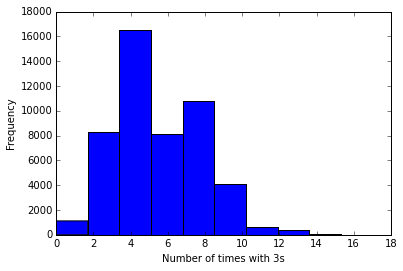

In [83]:
#0.055917 * 100
Number_of_times_I_observed_3 = 11

count_3s = []
extreme = 0
for i in range(50000):
    outcome = 100 * prob_of_outcome_tossing_n_dice(3, 2, 100)
    count_3s.append( outcome )
    if outcome >= 11:
        extreme += 1

print extreme / float(50000)
plt.hist(count_3s)
plt.xlabel("Number of times with 3s")
plt.ylabel("Frequency")

plt.show()


In [65]:
# Calculate pi by calculating area of quarter circle

def estimate_pi(n_attempts = 10000):
    """ Estimate pi from area of quarter circle """ 
    count_successes = 0
    for i in range(n_attempts):
        x_rand = np.random.random()
        y_rand = np.random.random()
        dist = math.sqrt( x_rand **2 + y_rand**2 )
        if dist <= 1.:
            count_successes += 1
    return float(count_successes) / n_attempts


print math.pi / 4.
print estimate_pi(10)

0.785398163397
0.9


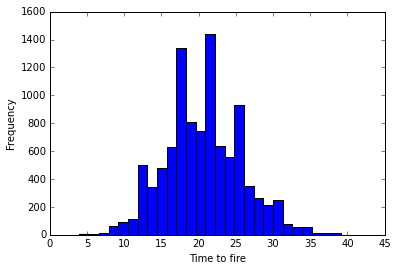

In [70]:
#%matplotlib inline
import matplotlib.pyplot as plt

# Calculate distribution of firing times of a model neuron

def time_to_fire( threshold , lamb, scale_size):
    """ Simulate distribution of times for neuron that sums
    inputs and fires when sum exceeds threshold """
    state = 0.
    time = 0.
    while state < threshold: 
        # Update time
        delay_between_inputs = np.random.poisson(lamb)
        time += delay_between_inputs
        
        # Update state
        size_of_input = scale_size * np.random.random()
        state += size_of_input
        
    return time    

# Initialize variables
N_neurons = 10000
threshold = 1.
scale_size = 0.1
lamb = 1.

list_times = []
for neuron in range(N_neurons):
    list_times.append( time_to_fire( threshold , lamb, scale_size) )

    
#print list_times

plt.hist(list_times, 30)
plt.xlabel("Time to fire")
plt.ylabel("Frequency")

plt.show()
